# Frequency Analysis and Demo Bode-plot

In this demo notebook some methods used to do frequency analysis is demonstrated.
You need to have SciPy library for Python, already in Anaconda distribution - otherwise install `conda install scipy`.

## 1 Introduction 

Within `signal` we will create a linear transfer function $H(s)=\frac{1}{0.001s^2+0.03s+2}$ 


In [3]:
from scipy import signal
s1 = signal.lti([1], [0.001,0.03,2]) # task 1.1 put correct values of transfer function coefficients

Now we will comput magnitude and phase part of https://en.wikipedia.org/wiki/Bode_plot

In [4]:
w, mag, phase = signal.bode(s1)

Visualize bode-plot using `matplotlib`.

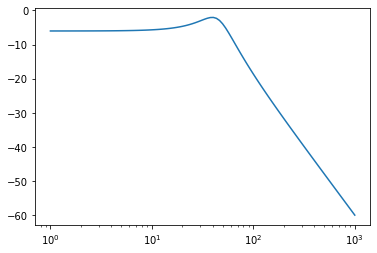

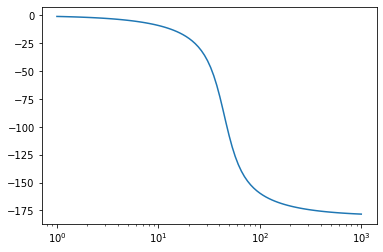

In [5]:
# plot bode plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot

plt.figure()
plt.semilogx(w, phase)  # Bode phase plot

plt.show()


## 2 Working with MAT files 

In order to read `.mat`file, there exist DyMat library for Python for reading and exporting files from this data file. Install it by `pip install DyMat`. https://www.j-raedler.de/projects/dymat/

In [6]:
import DyMat

In [7]:
d = DyMat.DyMatFile("CirculatoryControl.mat")# TASK 2.1 copy the MAT file next to ipynb file and place the filename e.g.'CirculatoryControl.mat'

In [8]:
d.names()

dict_keys(['Kp', 'fp', 'Ks', 'fs', 'PI', 'chirpSignal.w_start', 'chirpSignal.w_end', 'chirpSignal.A', 'chirpSignal.M', 'chirpSignal.y', 'gain.k', 'gain.u', 'gain.y', 'add.u1', 'add.u2', 'add.y', 'add.k1', 'add.k2', 'add1.u1', 'add1.u2', 'add1.y', 'add1.k1', 'add1.k2', 'Ap.k', 'Ap.u', 'Ap.y', 'SANodeVagalTF.u', 'SANodeVagalTF.y', 'SANodeVagalTF.b[1]', 'SANodeVagalTF.a[1]', 'SANodeVagalTF.a[2]', 'SANodeVagalTF.initType', 'SANodeVagalTF.x_start[1]', 'SANodeVagalTF.y_start', 'SANodeVagalTF.x[1]', 'SANodeDelay.u', 'SANodeDelay.y', 'SANodeDelay.delayTime', 'As.k', 'As.u', 'As.y', 'SANodeSympTF.u', 'SANodeSympTF.y', 'SANodeSympTF.b[1]', 'SANodeSympTF.a[1]', 'SANodeSympTF.a[2]', 'SANodeSympTF.initType', 'SANodeSympTF.x_start[1]', 'SANodeSympTF.y_start', 'SANodeSympTF.x[1]', 'add2.u1', 'add2.u2', 'add2.y', 'add2.k1', 'add2.k2', 'HR', 'Vasculature.k', 'Vasculature.u', 'Vasculature.y', 'VascularDelay.u', 'VascularDelay.y', 'VascularDelay.delayTime', 'add3.u1', 'add3.u2', 'add3.y', 'add3.k1', 'add

The 'time' variable is stored next to each model variable as abscissa. In order to get time values related to the variable values call `d.abscissa('variable_name',valuesOnly=True)`

In [9]:
dsize = len(d['LungVolumeChange'])
print(dsize)
print(d.abscissa('LungVolumeChange',valuesOnly=True))

502
[  0.    0.6   1.2   1.8   2.4   3.    3.6   4.2   4.8   5.4   6.    6.6
   7.2   7.8   8.4   9.    9.6  10.2  10.8  11.4  12.   12.6  13.2  13.8
  14.4  15.   15.6  16.2  16.8  17.4  18.   18.6  19.2  19.8  20.4  21.
  21.6  22.2  22.8  23.4  24.   24.6  25.2  25.8  26.4  27.   27.6  28.2
  28.8  29.4  30.   30.6  31.2  31.8  32.4  33.   33.6  34.2  34.8  35.4
  36.   36.6  37.2  37.8  38.4  39.   39.6  40.2  40.8  41.4  42.   42.6
  43.2  43.8  44.4  45.   45.6  46.2  46.8  47.4  48.   48.6  49.2  49.8
  50.4  51.   51.6  52.2  52.8  53.4  54.   54.6  55.2  55.8  56.4  57.
  57.6  58.2  58.8  59.4  60.   60.6  61.2  61.8  62.4  63.   63.6  64.2
  64.8  65.4  66.   66.6  67.2  67.8  68.4  69.   69.6  70.2  70.8  71.4
  72.   72.6  73.2  73.8  74.4  75.   75.6  76.2  76.8  77.4  78.   78.6
  79.2  79.8  80.4  81.   81.6  82.2  82.8  83.4  84.   84.6  85.2  85.8
  86.4  87.   87.6  88.2  88.8  89.4  90.   90.6  91.2  91.8  92.4  93.
  93.6  94.2  94.8  95.4  96.   96.6  97.2  97.8  

In [10]:
def plot(x,y,z=None):
    %matplotlib inline
    import matplotlib.pyplot as plt
    fig = plt.figure()
    plt.plot(x,y,'r')
    if z is not None:
        plt.plot(x,z,'b')
    plt.show()

Now plot `LungVolumeChange`:

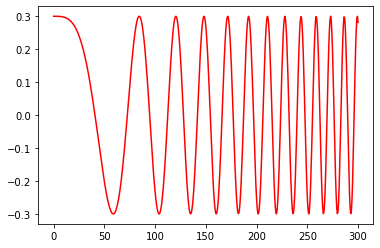

In [11]:
plot(d.abscissa("LungVolumeChange",valuesOnly=True),d["LungVolumeChange"]) # Task 2.2 replace with variable name

Now plot heart rate change.

In [12]:
plot(d.abscissa(...,valuesOnly=True),d[...]) # Task 2.3 replace ... with variable containing heart rate change

KeyError: Ellipsis

## 3 Curve fitting

As demo we will randomly create some points arround $f(x)=2.9 \sin(1.5 x)$

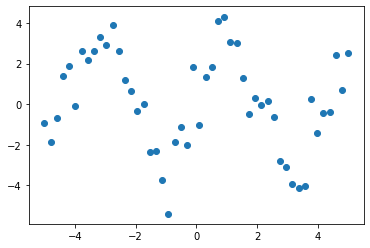

In [13]:
import numpy as np

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50) # task 3.1 replace ... so it computesvalues e.g.:2.9 and 1.5

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

Now fit simple sine over the random points

In [18]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[4, 7])

print(params)

[0.33368842 6.84285063]


Plot fitted curve over the points

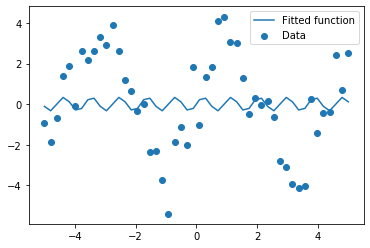

In [19]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

Simulate transfer function, implement chirp function $y=\sin(W_s t + \frac{(W_e-W_s)t^2}{2 M})$

In [ ]:
def chirp(Ws,We,A,M,time):
    return sin(Ws*time+(We-Ws)*t*t/2*M);

In [ ]:
def simulatettf(a,b,c,d,input,inputtime):
    myttf = scipy.signal.lti([a],[b,c,d])
    res = myttf.output(input,inputtime)
    return res


In [ ]:
myres = simulatettf(1,0.001,0.03,2,d['chirpSignal.y'],d.abscissa('chirpSignal.y',valuesOnly=True))
def simulatechirp(x,a,b,c,d):
    return simulatettf()

In [ ]:
plot(myres[0],myres[1])

In [ ]:
#Assignement - identify parameters of transfer function, and bode plot of the transfer function 

#def residuals(c, y, t):
#    return y - simulatettf(c[0],c[1],c[2],c[3],d['chirpSignal.y'],t)[1]
#x0 = np.array([1, 0.001, 0.03, 2], dtype=float)
#x, flag = scipy.optimize.least_squares(residuals, x0, args=(d['HR'], d.abscissa('HR',valuesOnly=True)))